In [1]:
# map groups -----

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context('talk')

# file paths and names
path_shp = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/00-Data-Sources/00-Cloud-to-Street/01-District-level/Districts-Shapefiles/216distboufinal-v2.shp'

path_output = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/01-TC-Assignment/Perc-Flooded-NRT/Cropland/perc_cropland_flooded_shp/'
name_output_csv = 'perc_cropland_flooded.csv'
name_output_file = 'perc_cropland_flooded.shp'

var = 'flood_area'

In [2]:
x = pd.read_csv('Ghana_Stats_Rec_v2.csv')


In [3]:
n = 50
the_top = x.groupby('admin2name', as_index=False).mean().sort_values(by=[var], ascending=False).head(n)[['admin2name', 'crop_area', 'flood_area', 'pop_sum']]
the_top

,admin2name,crop_area,flood_area,pop_sum
76,East Gonja,1162.426027,5697.173065,409.602353
90,Gonja Central,200.452187,4817.947214,579.921569
173,Sene East,199.837371,3585.362489,94.457143
121,Kwahu Afram Plains North,421.964827,2983.923305,63.428571
122,Kwahu Afram Plains South,215.776534,2964.145340,34.371429
115,Krachi East,250.450612,2668.749133,59.228571
112,Kpandai,374.076167,2579.731817,48.457143
158,Pru,507.714659,2579.138738,9.028571
212,West Mamprusi,1386.353688,2063.622580,19.386891
118,Kumbumgu,795.344749,1999.977246,1.885714


In [4]:
x.groupby('admin2name', as_index=False).mean().sort_values(by=[var], ascending=False).tail(216-n)[['admin2name', 'crop_area', 'flood_area', 'pop_sum']]


,admin2name,crop_area,flood_area,pop_sum
186,Talensi,92.259086,154.647038,0.342857
140,Nandom,17.819930,152.432827,1.200000
213,Yendi Municipal,85.748382,148.693800,4.671261
139,Nadowli / Kaleo,37.442100,145.658445,0.571429
179,South Dayi,7.906207,143.162664,16.800000
...,...,...,...,...
97,Jasikan,0.007599,0.009487,0.000000
171,Sekyere Kumawu,0.002536,0.005072,0.000000
146,Nkoranza South,0.005065,0.005065,0.000000
30,Asokore Mampong Municipal,0.000000,0.000000,0.000000


In [5]:
x['treatment'] = None
top_lst = list(set(the_top['admin2name']).intersection(set(x['admin2name'])))
top_idx = x[x['admin2name'].isin(top_lst)].sort_values(by=['admin2name']).index

In [6]:
x.loc[top_idx, 'treatment'] = 1
x = x.fillna(value=0)

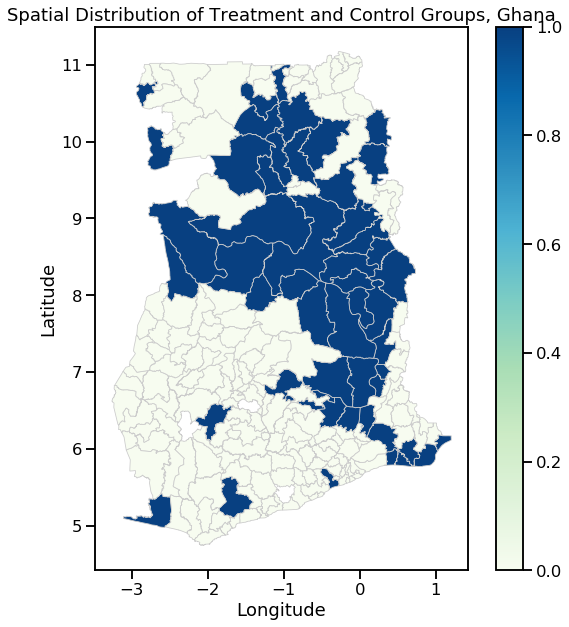

In [7]:
# file paths and names
path_shp = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/00-Data-Sources/00-Cloud-to-Street/01-District-level/Districts-Shapefiles/216distboufinal-v2.shp'

path_output = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/01-TC-Assignment/Perc-Flooded-NRT/Cropland/perc_cropland_flooded_shp/'
name_output_csv = 'perc_cropland_flooded.csv'
name_output_file = 'perc_cropland_flooded.shp'

# clean districts shapefile
ghana_dist = gpd.read_file(path_shp)
ghana_dist['DISTRICT'] = ghana_dist['DISTRICT'].str.title()

# map using geopandas
merged = ghana_dist.set_index('DISTRICT').join(x[x['year'] == 2000].set_index('admin2name'))
#merged

merged = merged.sort_values(by=['treatment'], ascending=False)

# set a variable that will call whatever column we want to visualise on the map
variable = 'treatment'
colorscale = 'GnBu'

# set the range for the choropleth
vmin, vmax = min(merged[variable]), max(merged[variable])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))

# create map
merged.plot(column=variable, cmap=colorscale, linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Spatial Distribution of Treatment and Control Groups, Ghana')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

sm = plt.cm.ScalarMappable(cmap=colorscale, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

plt.show()


In [8]:
#x.groupby('treatment', as_index=False).count()

x = x[x['year'] > 2010]

In [9]:
x.groupby('treatment').count()

,admin0name,admin1name,admin2name,crop_area,flood_area,pop_sum,year
treatment,,,,,,,
0,1660,1660,1660,1660,1660,1660,1660
1,500,500,500,500,500,500,500


In [10]:
control = x[x['treatment'] == 0].groupby('year', as_index=False).mean()
treatment = x[x['treatment'] == 1].groupby('year', as_index=False).mean()

In [11]:
treatment

,year,crop_area,flood_area,pop_sum,treatment
0,2011,525.998588,2997.868052,158.459373,1
1,2012,359.395572,2474.971554,109.779373,1
2,2013,527.884140,2811.054225,93.277961,1
3,2014,208.837203,1055.186541,70.525412,1
4,2015,414.633743,828.625114,27.626353,1
5,2016,386.879654,970.132232,40.585412,1
6,2017,88.138211,358.809472,36.276392,1
7,2018,707.401780,2805.598100,67.665569,1
8,2019,319.698135,2400.547998,110.758039,1
9,2020,1508.656837,4294.034988,118.991059,1


In [12]:
control

,year,crop_area,flood_area,pop_sum,treatment
0,2011,4.124269,28.590303,3.670801,0
1,2012,3.604863,30.624991,3.332459,0
2,2013,10.856574,58.366375,4.168391,0
3,2014,8.589071,54.827961,8.262107,0
4,2015,14.549729,63.032056,5.389511,0
5,2016,14.027353,76.780808,40.361800,0
6,2017,9.505804,51.009928,7.210820,0
7,2018,19.508757,100.681550,13.694543,0
8,2019,8.648960,72.369154,7.505221,0
9,2020,40.313968,107.689692,9.029152,0


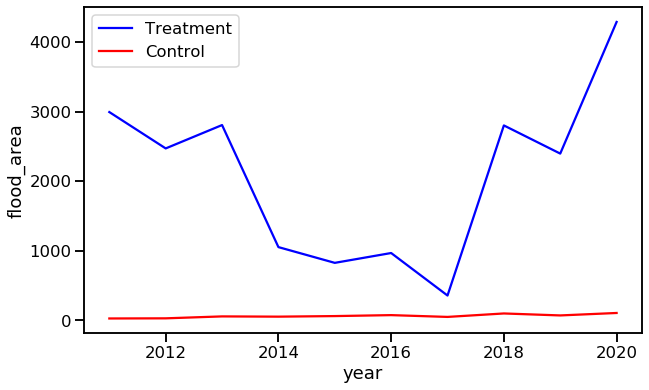

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# observe if parallel trends exist -----

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 6))

# plot treatment and control lines
sns.lineplot(x = treatment['year'], y = treatment[var], label='Treatment',color='b')
sns.lineplot(x = control['year'], y = control[var], label='Control', color='r')
